In [ ]:
!pip install pydub
!pip install moviepy


In [ ]:
from pydub import AudioSegment

def convert_m4a_to_wav(m4a_file, wav_file):
    # Load the M4A file
    audio = AudioSegment.from_file(m4a_file, format="m4a")

    # Export the audio to WAV format
    audio.export(wav_file, format="wav")

# Example usage
m4a_file = "/content/AISIP.m4a"
wav_file = "Bhanumathiwedsrajat.wav"
convert_m4a_to_wav(m4a_file, wav_file)


In [ ]:
import librosa

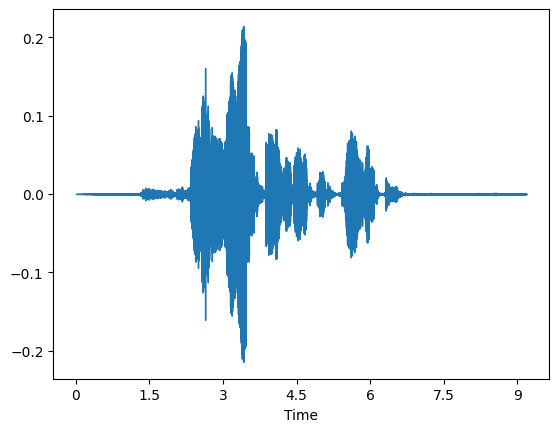

In [ ]:
speech_data, sr = librosa.load('/content/Bhanumathiwedsrajat.wav', sr=None)

librosa.display.waveshow(speech_data)

In [ ]:
def extract_mfcc(file_path, n_mfcc=13):
    # Load the audio file


    # Extract MFCC features
    mfccs = mfcc(file_path, sr=sr, n_mfcc=n_mfcc)

    return mfccs

def combine_phonemes(phonemes, word):
    # Implement phoneme combination for the given word
    pass

def synthesize_speech(phonemes):
    # Implement speech synthesis using the combined phonemes
    pass

def play_audio(audio_data):
    # Implement audio playback
    pass


In [ ]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load speech data
def load_data(file_path):
    audio_data, _ = librosa.load(file_path, sr=16000)  # Load audio data with a sampling rate of 16kHz
    return audio_data

# Feature extraction using Short-Time Fourier Transform (STFT)
def extract_stft(audio_data):
    stft = np.abs(librosa.stft(audio_data, n_fft=400, hop_length=160, win_length=400))
    return stft

# Define LSTM model
def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# Example usage
file_path = "/content/Bhanumathiwedsrajat.wav"
audio_data = load_data(file_path)
stft_features = extract_stft(audio_data)

# Reshape STFT features to have the correct shape
stft_features = stft_features.T  # Transpose for correct shape
stft_features = np.expand_dims(stft_features, axis=0)  # Add batch dimension

# For LSTM
input_shape_lstm = stft_features.shape[1:]
num_classes = 10  # Example number of classes
lstm_model = create_lstm_model(input_shape_lstm, num_classes)
print("lstm with lpc  ", lstm_model.summary())

# For Bi-LSTM with stft
stft_features = stft.T  # Transpose for correct shape
stft_features = np.expand_dims(stft_features, axis=0)  # Add batch dimension

input_shape_bi_stft = stft_features.shape[1:]  # Choose MFCC features for input
num_classes = 10  # Example number of classes_
lstm_stft = create_bi_lstm_model(input_shape_bi_stft, num_classes)
print("lstm with lpc  ", lstm_model.summary())

lpc_features = lcp.T  # Transpose for correct shape
lpc_features = np.expand_dims(lpc_features, axis=0)  # Add batch dimension
lpc_features = np.expand_dims(lpc_features, axis=1)  # Add time dimension
input_shape_lpc = lpc_features.shape[1:]  # Choose MFCC features for input
num_classes = 10  # Example number of classes_lstm_model = create_lstm_model(input_shape_bi_lpc, num_classes)

# Print model summary
print("lstm with lpc  ", lstm_model.summary())


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-84-bcb9523575af>, line 61)

In [ ]:
# Print model summary
print(lstm_model.summary())


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 423, 64)           68096     
                                                                 
 dense_57 (Dense)            (None, 423, 128)          8320      
                                                                 
 dense_58 (Dense)            (None, 423, 10)           1290      
                                                                 
Total params: 77706 (303.54 KB)
Trainable params: 77706 (303.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load speech data
def load_data(file_path):
    audio_data, _ = librosa.load(file_path, sr=16000)  # Load audio data with a sampling rate of 16kHz
    return audio_data

# Feature extraction using Short-Time Fourier Transform (STFT)
def extract_stft(audio_data):
    stft = np.abs(librosa.stft(audio_data, n_fft=400, hop_length=160, win_length=400))
    return stft

# Feature extraction using Mel-Frequency Cepstral Coefficients (MFCC)
def extract_mfcc(audio_data):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=16000, n_mfcc=13)
    return mfccs

# Feature extraction using Linear Predictive Coding (LPC) coefficients
def extract_lpc(audio_data):
    lpc = librosa.lpc(audio_data, order=16)
    return lpc

# Define Bi-LSTM model
def create_bi_lstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# Example usage
file_path = "/content/Bhanumathiwedsrajat.wav"
audio_data = load_data(file_path)
stft_features = extract_stft(audio_data)
mfcc_features = extract_mfcc(audio_data)
lpc_features = extract_lpc(audio_data)

stft_features = stft_features.T  # Transpose for correct shape
stft_features = np.expand_dims(stft_features, axis=0)

# For Bi-LSTM
input_shape_bi_lstm = mfcc_features.shape[1:]  # Choose MFCC features for input
num_classes = 10  # Example number of classes
bi_lstm_model = create_bi_lstm_model(input_shape_bi_lstm, num_classes)


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirect  (None, 133, 128)          39936     
 ional)                                                          
                                                                 
 dense_63 (Dense)            (None, 133, 128)          16512     
                                                                 
 dense_64 (Dense)            (None, 133, 10)           1290      
                                                                 
Total params: 57738 (225.54 KB)
Trainable params: 57738 (225.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load speech data
def load_data(file_path):
    audio_data, _ = librosa.load(file_path, sr=16000)  # Load audio data with a sampling rate of 16kHz
    return audio_data

# Feature extraction using Short-Time Fourier Transform (STFT)
def extract_stft(audio_data):
    stft = np.abs(librosa.stft(audio_data, n_fft=400, hop_length=160, win_length=400))
    return stft

# Feature extraction using Mel-Frequency Cepstral Coefficients (MFCC)
def extract_mfcc(audio_data):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=16000, n_mfcc=13)
    return mfccs

# Feature extraction using Linear Predictive Coding (LPC) coefficients
def extract_lpc(audio_data):
    lpc = librosa.lpc(audio_data, order=16)
    return lpc

# Define Bi-LSTM model
def create_bi_lstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# Example usage
file_path = "/content/Bhanumathiwedsrajat.wav"
audio_data = load_data(file_path)
mfcc_features = extract_mfcc(audio_data)
stft = extract_mfcc(audio_data)
lcp = extract_lpc(audio_data)
# Reshape MFCC features to have the correct shape
mfcc_features = mfcc_features.T  # Transpose for correct shape
mfcc_features = np.expand_dims(mfcc_features, axis=0)  # Add batch dimension

# For Bi-LSTM with mfcc
input_shape_bi_lstm = mfcc_features.shape[1:]  # Choose MFCC features for input
num_classes = 10  # Example number of classes
bi_lstm_model = create_bi_lstm_model(input_shape_bi_lstm, num_classes)
print("bi lstm with mfcc",bi_lstm_model.summary())


# For Bi-LSTM with stft
stft_features = stft.T  # Transpose for correct shape
stft_features = np.expand_dims(stft_features, axis=0)  # Add batch dimension

input_shape_bi_stft = stft_features.shape[1:]  # Choose MFCC features for input
num_classes = 10  # Example number of classes
bi_lstm_stft = create_bi_lstm_model(input_shape_bi_stft, num_classes)
print("bi lstm with stft ",bi_lstm_model.summary())

lpc_features = lcp.T  # Transpose for correct shape
lpc_features = np.expand_dims(lpc_features, axis=0)  # Add batch dimension
lpc_features = np.expand_dims(lpc_features, axis=1)  # Add time dimension
input_shape_bi_lpc = lpc_features.shape[1:]  # Choose MFCC features for input
num_classes = 10  # Example number of classes
bi_lstm_model = create_bi_lstm_model(input_shape_bi_lpc, num_classes)

# Print model summary
print("bi lstm with lpc  ",bi_lstm_model.summary())

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_26 (Bidirect  (None, 133, 128)          39936     
 ional)                                                          
                                                                 
 dense_91 (Dense)            (None, 133, 128)          16512     
                                                                 
 dense_92 (Dense)            (None, 133, 10)           1290      
                                                                 
Total params: 57738 (225.54 KB)
Trainable params: 57738 (225.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
bi lstm with mfcc None
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_26 (Bidirect  (None,

In [ ]:
print(stft_features.shape)
print(mfcc_features.shape)
print(lpc_features.shape)

(1, 133, 13)
(1, 133, 13)
(1, 1, 17)


In [ ]:
import numpy as np
def extract_features(audio_samples, sample_rate):
    stft_features = np.abs(stft(audio_samples, fs=sample_rate, nperseg=400, noverlap=240)[2])  # Short-Time Fourier Transform
    mfcc_features = mfcc(audio_samples, samplerate=sample_rate)  # MFCC
    # Calculate Linear Prediction Coefficients (LPC) using a library or your custom implementation
    lpc_features = calculate_lpc(audio_samples)
    return stft_features, mfcc_features, lpc_features

In [ ]:
import soundfile as sf
# function to load test audio and extract features
def load_and_extract_test_features(test_audio_file):
    # Load test audio file
    test_audio_samples, test_sample_rate = sf.read(test_audio_file)
    # Extract features from test audio samples
    test_stft_features, test_mfcc_features, test_lpc_features = extract_features(test_audio_samples, test_sample_rate)
    return test_stft_features, test_mfcc_features, test_lpc_features

# Load and extract features from test audio file
test_audio_file = "/content/Bhanumathiwedsrajat.wav"  # Replace with your test audio file
test_stft_features, test_mfcc_features, test_lpc_features = load_and_extract_test_features(test_audio_file)

# Predictions
# Reshape features with an additional axis for timesteps
test_stft_features = np.expand_dims(test_stft_features, axis=1)
test_mfcc_features = np.expand_dims(test_mfcc_features, axis=1)
test_lpc_features = np.expand_dims(test_lpc_features, axis=1)


# Print predictions
print("STFT LSTM Predictions:", stft_lstm_predictions)
print("MFCC Bi-LSTM Predictions:", mfcc_bilstm_predictions)
print("LPC Bi-LSTM Predictions:", lpc_bilstm_predictions)

# Placeholder labels for demonstration
labels_stft = np.random.randint(0, 10, size=len(test_stft_features))  # Assuming 10 output classes
labels_mfcc = np.random.randint(0, 10, size=len(test_mfcc_features))
labels_lpc = np.random.randint(0, 10, size=len(test_lpc_features))



TypeError: 'numpy.ndarray' object is not callable